## Decision Trees
### Agenda
1. Introduction to Decision Trees
2. The Decision Tree Algorithms
3. Decision Tree for Classification

### 1. Introduction to Decision Trees
```
* Non-parametric supervised learning method for regression & classification
* It's similar to playing 'dumb charades'.
* A good algorithm will have less & right questions compared to not-so-good one
* The nodes are questions & leafs are prediction
```


# 数据离散，决策树的优势，

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

%matplotlib inline

### import data

In [2]:
play_data = pd.read_csv('./DSVC/datasets/tennis.csv.txt')

### show data

In [3]:
play_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


* A decision tree for above data

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">

### 2. Decision Tree Algorithm

* Decision Tree is based on (CART) which is advancement of ID3, developed in 1986 by Ross Quinlan.
* ID3 works when feature data & target data both are categorical in nature
* C4.5 is an advancement of ID3, it coverts continues features into categorical features. Then, proceeds with ID3
* CART is based on C4.5, with slight advancement of 'target can be continues'.
* scikit-learn decision trees are based on CART

#### Criterion of creating Decision Tree
* Entropy - Objective of CART is to maximize information gain in each split
* Gini Impurity - If classes are mixed, gini impurity is maximul
##### Both the approaches, yields almost same results. We will discuss algorithm using Entropy


### Entropy of play
* Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)

In [4]:
# 统计该列情况
play_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

### Calculation Entropy

根据上边公式，你需要完成下面代码块中Entropy_Play计算的代码

In [10]:
import math
num = len(play_data)
labels = {}                
for feaVec in play_data.play: #统计所有标签的个数
    label = feaVec[-1]   
    if label not in labels.keys():
        labels[label] = 0
    labels[label] += 1       
Entropy_Play = 0.0
for key in labels:               #计算熵
    prob = float(labels[key]) / num 
    Entropy_Play -=  prob * math.log (prob, 2)
Entropy_Play

0.9402859586706309

你的Entropy_Play正确结果应该为：0.940285

### Information Gain
* The information gain is based on the decrease in entropy after a dataset is split on an attribute. 
* Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
* Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ]
* We intend to choose the attribute, splitting by which information gain will be the most
* Next step is calculating information gain for all attributes

#### Information Gain on splitting by Outlook   
#### 计算以天气情况为结点进行划分时的信息增益      
* $Gain(Play, Outlook) = Entropy(Play) - \sum{[p(Play|Outlook) * Entropy(Play|Outlook)]}$  
* $Gain(Play, Outlook) = Entropy(Play) - [p(play|Outlook=Sunny) * Entropy(Play|Outlook=Sunny)] - [p(Play|Outlook=Overcast) * Entropy(Play|Outlook=Overcast)] - [p(Play|Outlook=Rain) * Entropy(Play|Outlook=Rain))]$   

In [11]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


### Calculation Information Gain

你需要完成下面代码块中Entropy_Play_Outlook_Sunny计算的代码

In [12]:
num_s = len(play_data[play_data.outlook == 'sunny'])
labels = {}
for feaVec in play_data[play_data.outlook == 'sunny'].play: #统计所有标签的个数
    label = feaVec[-1]
    if label not in labels.keys():
        labels[label] = 0
    labels[label] += 1
Entropy_Play_Outlook_Sunny = 0.0
for key in labels: #计算熵
    prob = float(labels[key]) / num_s
    Entropy_Play_Outlook_Sunny -=  prob * math.log (prob, 2)
Entropy_Play_Outlook_Sunny

0.9709505944546686

你的Entropy_Play_Outlook_Sunny正确结果应该为：0.970951

In [13]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [15]:
# Entropy(Play|Outlook=overcast)
# Since, it's a homogenous data entropy will be 0
num_o = len(play_data[play_data.outlook == 'overcast'])
labels = {}
for feaVec in play_data[play_data.outlook == 'overcast'].play: #统计所有标签的个数
    label = feaVec[-1]
    if label not in labels.keys():
        labels[label] = 0
    labels[label] += 1
Entropy_Play_Outlook_Overcast = 0.0
for key in labels: #计算熵
    prob = float(labels[key]) / num_o
    Entropy_Play_Outlook_Overcast -=  prob * math.log (prob, 2)
Entropy_Play_Outlook_Overcast

0.0

In [16]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [18]:
# Entropy(Play|Outlook=rainy)
num_r = len(play_data[play_data.outlook == 'rainy'])
labels = {}
for feaVec in play_data[play_data.outlook == 'rainy'].play: #统计所有标签的个数
    label = feaVec[-1]
    if label not in labels.keys():
        labels[label] = 0
    labels[label] += 1
Entropy_Play_Outlook_Rainy = 0.0
for key in labels: #计算熵
    prob = float(labels[key]) / num_r
    Entropy_Play_Outlook_Rainy -=  prob * math.log (prob, 2)
Entropy_Play_Outlook_Rainy

0.9709505944546686

你的Entropy_Play_Outlook_Rain正确结果应该为：0.970951

#### Gain on splitting by attribute outlook

根据以下公式计算Gain

In [19]:
#Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – 
#[ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]

Gain = Entropy_Play - (Entropy_Play_Outlook_Sunny * num_s/num)-(Entropy_Play_Outlook_Overcast * num_o/num)-(Entropy_Play_Outlook_Rainy * num_r/num)
Gain

0.24674981977443905

你的Gain(Play,Outlook)正确结果应该为:0.246750

#### Other gains
* Gain(Play, Temperature) - 0.029
* Gain(Play, Humidity) - 0.151
* Gain(Play, Wind) - 0.048

#### Conclusion - Outlook is winner & thus becomes root of the tree
<img src="https://i1.wp.com/sefiks.com/wp-content/uploads/2017/11/tree-v1.png?zoom=1.25&resize=728%2C252&ssl=1" width="600px">

### Time to find the next splitting criteria

In [20]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


##### Conclusion - If outlook is overcast, play is true

### Let's find the next splitting feature

In [25]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


你需要在下面计算Entropy_Play_Outlook_Sunny

In [26]:
# Entropy(Play_Sunny|)
Entropy_Play_Outlook_Sunny = None
Entropy_Play_Outlook_Sunny = -(3 / 5) * np.log2(3 / 5) - (2 / 5) * np.log2(2 / 5)

In [27]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

你的Entropy_Play_Outlook_Sunny正确结果应该为:0.970951

### Information Gain for humidity

计算湿度信息增益

In [101]:
play_data[play_data.outlook == 'sunny'][play_data.humidity == 'high']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [30]:
play_data[play_data.outlook == 'sunny'][play_data.humidity == 'normal']

/Users/barackbao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [34]:
#Entropy for attribute high = 0, also entropy for attribute normal = 0 
Gain=None
Gain = Entropy_Play_Outlook_Sunny - (3 / 5) * 0 - (2 / 5) * 0

In [35]:
Gain

0.9709505944546686

你的Information Gain for humidity正确结果应该为:0.970951

### Information Gain for windy
* False -> 3 -> [1+ 2-]
* True -> 2 -> [1+ 1-]

计算Entropy_Wind_False

In [36]:
# 查看sunny情况下，windy为false的样本情况  
play_data[play_data.outlook == 'sunny'][play_data.windy == False]

/Users/barackbao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes


In [37]:
# 查看sunny情况下，windy为false的样本情况  
play_data[play_data.outlook == 'sunny'][play_data.windy == True]

/Users/barackbao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,outlook,temp,humidity,windy,play
1,sunny,hot,high,True,no
10,sunny,mild,normal,True,yes


In [38]:
Entropy_Wind_False = None
Entropy_Wind_False = -(1 / 3) * np.log2(1 / 3) - (2 / 3) * np.log2(2 / 3)

In [39]:
Entropy_Wind_False

0.9182958340544896

你的Entropy_Wind_False正确结果应该为:0.918296

计算Entropy_Wind_True

In [40]:
Entropy_Wind_True = -(1 / 2) * np.log2(1 / 2) - (1 / 2) * np.log2(1 / 2)
Entropy_Wind_True

1.0

计算风信息增益

In [41]:
Gain = Entropy_Play_Outlook_Sunny - (3 / 5 * Entropy_Wind_False) - 2 / 5
Gain

0.01997309402197489

你的Information Gain for windy正确结果应该为:0.019973

### Information Gain for temperature
* hot -> 2 -> [2- 0+]
* mild -> 2 -> [1+ 1-]
* cool -> 1  -> [1+ 0-]

计算热度信息增益

In [42]:
play_data[play_data.outlook=='sunny'][play_data.temp == 'hot']

/Users/barackbao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no


In [43]:
play_data[play_data.outlook=='sunny'][play_data.temp == 'mild']

/Users/barackbao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,outlook,temp,humidity,windy,play
7,sunny,mild,high,False,no
10,sunny,mild,normal,True,yes


In [44]:
play_data[play_data.outlook=='sunny'][play_data.temp == 'cool']

/Users/barackbao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes


In [45]:
Entropy_Tem_Hot = 0
Entropy_Tem_Mild = 1
Entropy_Tem_Cool = 0
Gain = Entropy_Play_Outlook_Sunny - (2 / 5)
Gain

0.5709505944546686

你的Information Gain for windy正确结果应该为:0.570951

#### Conclusion : Humidity is the best choice on sunny branch

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt3.PNG?raw=true" width="600px">

In [46]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'high')]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [47]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'normal')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


### Splitting the rainy branch

In [48]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [49]:
# Entropy(Play_Rainy|)
Entropy_Play_Outlook_Rainy = None
Entropy_Play_Outlook_Rainy = -(3 / 5) * np.log2(3 / 5) - (2 / 5) * np.log2(2 / 5)

In [50]:
Entropy_Play_Outlook_Rainy

0.9709505944546686

你的Entropy_Play_Outlook_Rainy正确结果应该为:0.970951

### Information Gain for temp
* mild -> 3 [2+ 1-]
* cool -> 2 [1+ 1-]

计算温度信息增益

In [52]:
play_data[play_data.outlook == 'rainy'][play_data.temp == 'mild']

/Users/barackbao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [53]:
play_data[play_data.outlook == 'rainy'][play_data.temp == 'cool']

/Users/barackbao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,outlook,temp,humidity,windy,play
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no


In [55]:
# 根据以上信息计算温度信息增益
Entropy_Tem_Mild = -(2 / 3) * np.log2(2 / 3) - (1 / 3) * np.log2(1 / 3)
Entropy_Tem_Cool = 1
print(Entropy_Tem_Mild)
Gain = Entropy_Play_Outlook_Rainy - (3 / 5) * Entropy_Tem_Mild - (2 / 5) * Entropy_Tem_Cool
Gain = Entropy_Play_Outlook_Rainy - (3 / 5) * 0.918 - (2 / 5) * 1
Gain

0.9182958340544896


0.020150594454668602

正确结果为0.020151

### Information Gain for Windy

计算风信息增益

In [56]:
play_data[play_data.outlook == 'rainy'][play_data.windy == True]

/Users/barackbao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,outlook,temp,humidity,windy,play
5,rainy,cool,normal,True,no
13,rainy,mild,high,True,no


In [57]:
play_data[play_data.outlook == 'rainy'][play_data.windy == False]

/Users/barackbao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [58]:
Gain = Entropy_Play_Outlook_Rainy
Gain

0.9709505944546686

正确结果为0.970951

### Information Gain for Humidity
* High -> 2 -> [1+ 1-]
* Normal -> 3 -> [2+ 1-]

In [59]:
play_data[play_data.outlook == 'rainy'][play_data.humidity == 'high']

/Users/barackbao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
13,rainy,mild,high,True,no


In [60]:
play_data[play_data.outlook == 'rainy'][play_data.humidity == 'normal']

/Users/barackbao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,outlook,temp,humidity,windy,play
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes


In [61]:
Entropy_Play_Outlook_Rainy_Normal = None
Entropy_Play_Outlook_Rainy_Normal = -(2 / 3) * np.log2(2 / 3) - (1 / 3) * np.log2(1 / 3)

In [62]:
Entropy_Play_Outlook_Rainy_Normal

0.9182958340544896

In [63]:
Entropy_Play_Outlook_Rainy_High = 1

Entropy_Play_Outlook_Rainy_Normal的正确结果为0.918296

计算湿度信息增益

In [64]:
Gain = Entropy_Play_Outlook_Rainy - (2 / 5 * Entropy_Play_Outlook_Rainy_High) - (3 / 5 * Entropy_Play_Outlook_Rainy_Normal)
Gain

0.01997309402197489

正确结果为0.019973

### Final Tree

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">

### 3. Decision Tree for Classification
* The leaf nodes of decision tree decides the class
* CART will convert features with continues values into categorical values
* Different tree will be generated with same data given in different order

In [103]:
from sklearn.datasets import load_iris
# 导出树
from sklearn.tree import export_graphviz

In [104]:
iris = load_iris()

In [105]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [106]:
iris.target[:5]

array([0, 0, 0, 0, 0])

请在下方实现交叉熵DecisionTreeClassifier：

In [107]:
# DecisionTreeClassifier entropy
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
trainX, testX, trainY, testY = train_test_split(iris.data, iris.target)

请利用实现的DecisionTreeClassifier进行训练：

In [110]:
def fit(trainX,trainY):
    dt.fit(trainX, trainY)

fit(trainX,trainY)

In [111]:
# 导出构建好的决策树结构
export_graphviz(dt,'dt.tree')

### Visualizing the tree
* http://www.webgraphviz.com/

* Criteria - Entropy
<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt6.PNG?raw=true">

在下方写代码来对测试集进行预测：

In [112]:
def predict(testX):
    return dt.predict(testX)
predict_y = predict(testX)

In [115]:
# 计算准确度
from sklearn.metrics import accuracy_score 
accuracy_score(testY, predict_y)

1.0

#### Feature Importances
* Important features will be higher up the tree
* We can use this techniques to identify important features

#### Visualizing Decision Decision Boundry

In [90]:
from sklearn.datasets import make_blobs

In [91]:
X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)

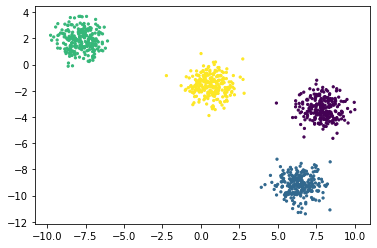

In [92]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis')

利用基尼系数的决策树实现：

In [93]:
# DecisionTreeClassifier gini
dt = DecisionTreeClassifier(criterion='gini')

进行训练

In [94]:
def fit(trainX,trainY):
    dt.fit(trainX, trainY)

fit(X,Y)

In [95]:
# 定义网格
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

### Calculation Outcome

你需要完成下面代码块中预测值的计算：

In [96]:
def predict():
    return dt.predict(np.c_[xx.ravel(), yy.ravel()])
outcome = predict()

In [97]:
xx.shape

(86, 109)

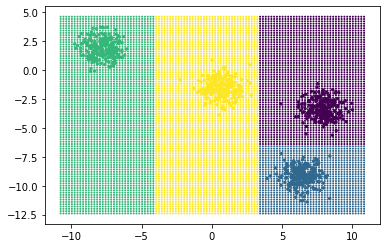

In [98]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.show()

![](img/questions-01.png)